In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import numpy as np
import statsmodels.api as sm

In [5]:
university_data = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/05_Exploring_Assumptions/Data_Files/RExam.dat', sep='\t')

In [6]:
print(university_data.head())

   exam  computer  lectures  numeracy  uni
0    18        54      75.0         7    0
1    30        47       8.5         1    0
2    40        58      69.5         6    0
3    30        37      67.0         6    0
4    40        53      44.5         2    0


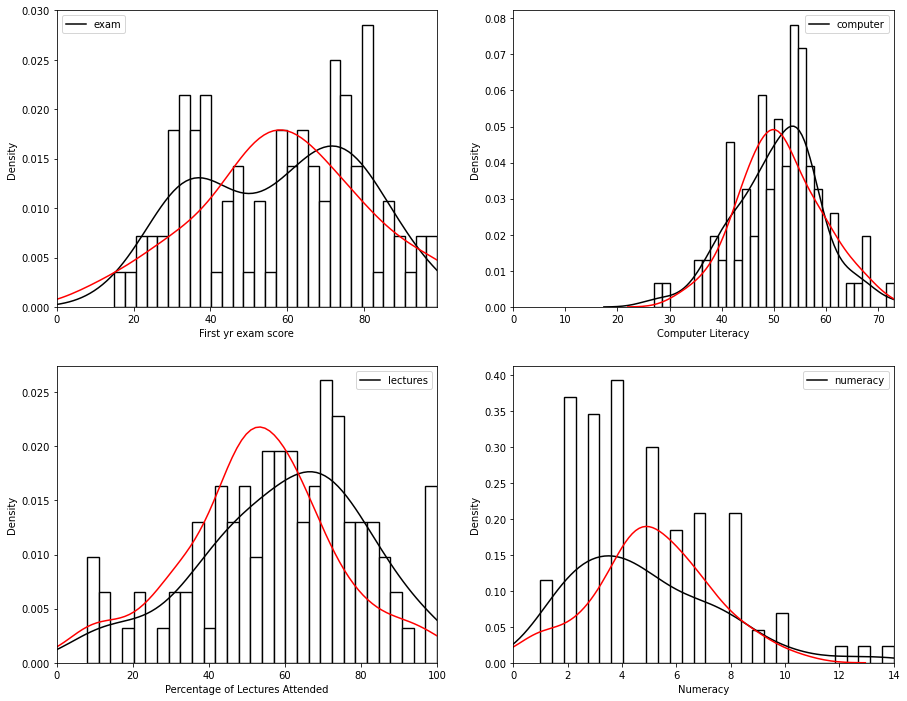

In [24]:
plt.figure(figsize=(15,12))
x = np.random.normal(university_data['exam'].mean(), university_data['exam'].std(),university_data['exam'].count())
ax1 = plt.subplot(2,2,1)
_ = plt.hist(university_data['exam'],density=True,bins=30, edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(university_data['exam'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,university_data['exam'].max() ])
_ = ax1.set_xlabel('First yr exam score')
_ = ax1.set_ylabel('Density')

x = np.random.normal(university_data['computer'].mean(), university_data['computer'].std(),university_data['computer'].count())
ax2 = plt.subplot(2,2,2)
_ = plt.hist(university_data['computer'],density=True,bins=30, edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(university_data['computer'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,university_data['computer'].max() ])
_ = ax2.set_xlabel('Computer Literacy')
_ = ax2.set_ylabel('Density')

x = np.random.normal(university_data['lectures'].mean(), university_data['lectures'].std(),university_data['lectures'].count())
ax3 = plt.subplot(2,2,3)
_ = plt.hist(university_data['lectures'],density=True,bins=30, edgecolor='black', color='white',linewidth=1.4)
_ = sns.kdeplot(university_data['lectures'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,university_data['lectures'].max() ])
_ = ax3.set_xlabel('Percentage of Lectures Attended')
_ = ax3.set_ylabel('Density')

x = np.random.normal(university_data['numeracy'].mean(), university_data['numeracy'].std(),university_data['numeracy'].count())
ax4 = plt.subplot(2,2,4)
_ = plt.hist(university_data['numeracy'],density=True,bins=30, edgecolor='black', color='white',linewidth=1.4)
_ = sns.kdeplot(university_data['numeracy'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,university_data['numeracy'].max() ])
_ = ax4.set_xlabel('Numeracy')
_ = ax4.set_ylabel('Density')

plt.show()

In [31]:
# Describing basic stats
print(university_data.describe())

            exam    computer    lectures    numeracy         uni
count  100.00000  100.000000  100.000000  100.000000  100.000000
mean    58.10000   50.710000   59.765000    4.850000    0.500000
std     21.31557    8.260035   21.684777    2.705681    0.502519
min     15.00000   27.000000    8.000000    1.000000    0.000000
25%     38.00000   45.750000   46.375000    3.000000    0.000000
50%     60.00000   51.500000   62.000000    4.000000    0.500000
75%     75.00000   56.000000   74.625000    7.000000    1.000000
max     99.00000   73.000000  100.000000   14.000000    1.000000


In [45]:
# Describing distributional stats
count = 0
for i in university_data.columns[:-1]:
    print('\n'*2,list(university_data.columns)[count], '\n', sp.describe(university_data[i]))
    count+=1



 exam 
 DescribeResult(nobs=100, minmax=(15, 99), mean=58.1, variance=454.35353535353534, skewness=-0.10538101836838216, kurtosis=-1.1100484227532972)


 computer 
 DescribeResult(nobs=100, minmax=(27, 73), mean=50.71, variance=68.22818181818182, skewness=-0.17163519579063727, kurtosis=0.28622083702835166)


 lectures 
 DescribeResult(nobs=100, minmax=(8.0, 100.0), mean=59.765, variance=470.2295707070709, skewness=-0.4160703668364525, kurtosis=-0.2295027824471978)


 numeracy 
 DescribeResult(nobs=100, minmax=(1, 14), mean=4.85, variance=7.320707070707071, skewness=0.9468828141246891, kurtosis=0.8399068513473207)


In [46]:
Dunce_data = university_data[university_data['uni']==0]
sussex_data = university_data[university_data['uni']==1]

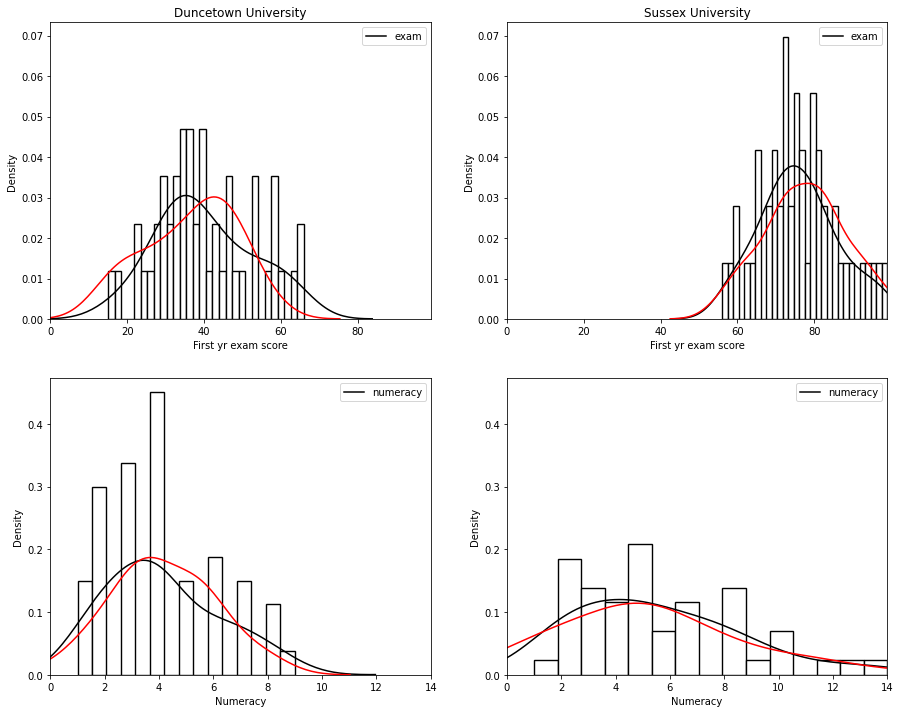

In [55]:
plt.figure(figsize=(15,12))

x = np.random.normal(Dunce_data['exam'].mean(), Dunce_data['exam'].std(),Dunce_data['exam'].count())
ax1 = plt.subplot(2,2,1)
plt.hist(Dunce_data['exam'],density=True, bins=30,edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(Dunce_data['exam'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,Dunce_data['exam'].max() ])
ax1.set_xlabel('First yr exam score')
ax1.set_ylabel('Density')
ax1.set_title('Duncetown University')

x = np.random.normal(sussex_data['exam'].mean(), sussex_data['exam'].std(),sussex_data['exam'].count())
ax2 = plt.subplot(2,2,2,sharey=ax1,sharex=ax1)
plt.hist(sussex_data['exam'],density=True, bins=30,edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(sussex_data['exam'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,sussex_data['exam'].max() ])
ax2.set_xlabel('First yr exam score')
ax2.set_ylabel('Density')
ax2.set_title('Sussex University')

x = np.random.normal(Dunce_data['numeracy'].mean(), Dunce_data['numeracy'].std(),Dunce_data['numeracy'].count())
ax3 = plt.subplot(2,2,3)
plt.hist(Dunce_data['numeracy'],density=True, bins=15,edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(Dunce_data['numeracy'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,Dunce_data['numeracy'].max() ])
ax3.set_xlabel('Numeracy')
ax3.set_ylabel('Density')

x = np.random.normal(sussex_data['numeracy'].mean(), sussex_data['numeracy'].std(),sussex_data['numeracy'].count())
ax4 = plt.subplot(2,2,4,sharex=ax3, sharey=ax3)
plt.hist(sussex_data['numeracy'],density=True, bins=15,edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(sussex_data['numeracy'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,sussex_data['numeracy'].max() ])
ax4.set_xlabel('Numeracy')
ax4.set_ylabel('Density')
               
plt.show()

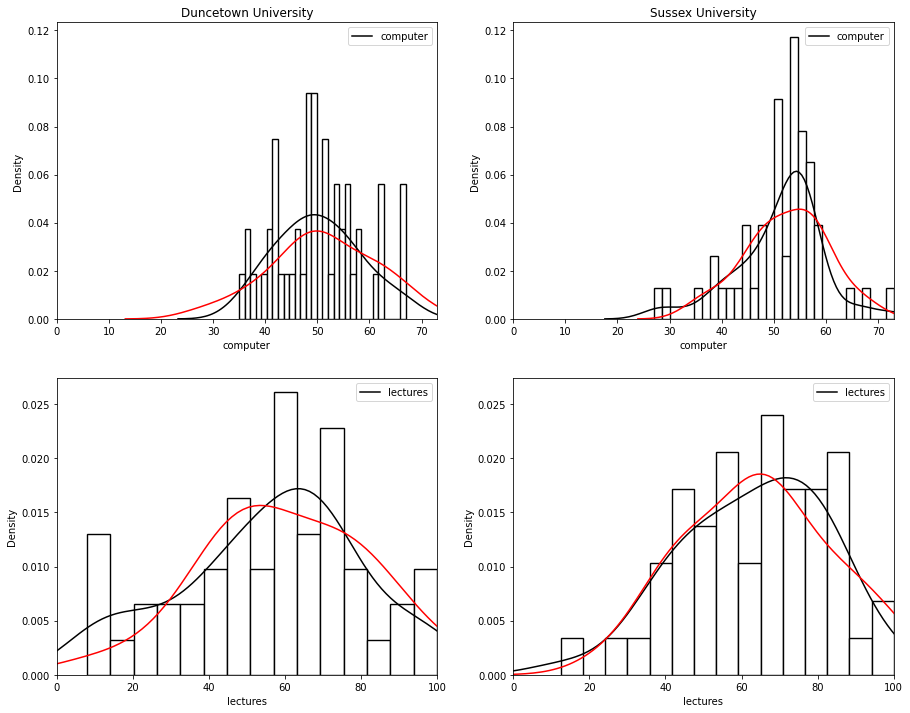

In [56]:
plt.figure(figsize=(15,12))

x = np.random.normal(Dunce_data['computer'].mean(), Dunce_data['computer'].std(),Dunce_data['computer'].count())
ax1 = plt.subplot(2,2,1)
plt.hist(Dunce_data['computer'],density=True, bins=30,edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(Dunce_data['computer'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,Dunce_data['computer'].max() ])
ax1.set_xlabel('computer')
ax1.set_ylabel('Density')
ax1.set_title('Duncetown University')

x = np.random.normal(sussex_data['computer'].mean(), sussex_data['computer'].std(),sussex_data['computer'].count())
ax2 = plt.subplot(2,2,2,sharey=ax1,sharex=ax1)
plt.hist(sussex_data['computer'],density=True, bins=30,edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(sussex_data['computer'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,sussex_data['computer'].max() ])
ax2.set_xlabel('computer')
ax2.set_ylabel('Density')
ax2.set_title('Sussex University')

x = np.random.normal(Dunce_data['lectures'].mean(), Dunce_data['lectures'].std(),Dunce_data['lectures'].count())
ax3 = plt.subplot(2,2,3)
plt.hist(Dunce_data['lectures'],density=True, bins=15,edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(Dunce_data['lectures'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,Dunce_data['lectures'].max() ])
ax3.set_xlabel('lectures')
ax3.set_ylabel('Density')

x = np.random.normal(sussex_data['lectures'].mean(), sussex_data['lectures'].std(),sussex_data['lectures'].count())
ax4 = plt.subplot(2,2,4,sharex=ax3, sharey=ax3)
plt.hist(sussex_data['lectures'],density=True, bins=15,edgecolor='black',color='white', linewidth=1.4)
_ = sns.kdeplot(sussex_data['lectures'], color='black')
_ = sns.kdeplot(x, color='red')
_ = plt.xlim([0,sussex_data['lectures'].max() ])
ax4.set_xlabel('lectures')
ax4.set_ylabel('Density')
               
plt.show()

## Doing Statistical tests for normality assumptions

In [62]:
# shapiro-wilk test on whole data
print(sp.shapiro(university_data['exam']))      # violates normality
print(sp.shapiro(university_data['computer']))  # normal
print(sp.shapiro(university_data['lectures']))  # normal
print(sp.shapiro(university_data['numeracy']))  # violated normality

(0.9613097906112671, 0.004991333466023207)
(0.9870546460151672, 0.4413094222545624)
(0.9769788384437561, 0.07712065428495407)
(0.924386739730835, 2.4239581762230955e-05)


In [63]:
# shapiro-wilk test on Duncetown data
print(sp.shapiro(Dunce_data['exam']))      # normal
print(sp.shapiro(Dunce_data['computer']))  # normal
print(sp.shapiro(Dunce_data['lectures']))  # normal
print(sp.shapiro(Dunce_data['numeracy']))  # violated normality

(0.9721663594245911, 0.2829025983810425)
(0.9776353240013123, 0.45711755752563477)
(0.9697414636611938, 0.2259107083082199)
(0.9408167600631714, 0.014514917507767677)


In [65]:
# shapiro-wilk test on Sussex data
print(sp.shapiro(sussex_data['exam']))      # normal
print(sp.shapiro(sussex_data['computer']))  # violated normality
print(sp.shapiro(sussex_data['lectures']))  # normal
print(sp.shapiro(sussex_data['numeracy']))  # violated normality

(0.9837116599082947, 0.7151228189468384)
(0.9439226388931274, 0.019314438104629517)
(0.9817163944244385, 0.6262670755386353)
(0.9323464632034302, 0.006786995101720095)


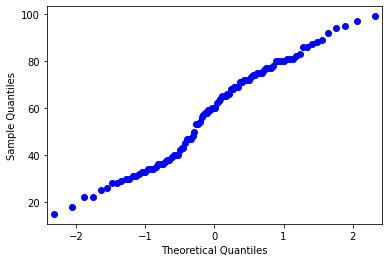

In [79]:
_ = sm.qqplot(university_data['exam'])  # see deviation from the 45 degree line
plt.show()

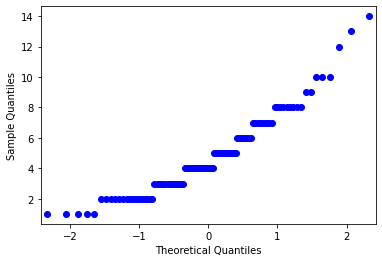

In [80]:
_ = sm.qqplot(university_data['numeracy'])   # see deviation from the 45 degree line
plt.show()

## Doing Statistical tests for homogeneity of variance

In [83]:
# levene test for exam score b/w Dunce and sussex¶
print(sp.levene(Dunce_data['exam'], sussex_data['exam']))   # non-significant

LeveneResult(statistic=2.088557499283053, pvalue=0.15159625694960951)


In [85]:
# levene test for numeracy b/w Dunce and sussex¶
print(sp.levene(Dunce_data['numeracy'], sussex_data['numeracy']))   # significant deviation

LeveneResult(statistic=5.366045071639426, pvalue=0.022615251034367147)
